# Diabetes Data Analysis and Prediction

This project involves analyzing and predicting risk scores for diabetes based on various features like blood glucose levels, BMI, and lifestyle factors. The project pipeline includes:

1. **Data Loading and Preprocessing**: Importing the dataset and performing initial checks for missing values, duplicates, and other potential data issues.
2. **Exploratory Data Analysis (EDA)**: Analyzing the relationships between features, outliers, and trends over time.
3. **Data Cleaning and Transformation**: Removing outliers and scaling the data for modeling.
4. **Clustering and Dimensionality Reduction**: Applying unsupervised learning techniques such as K-Means clustering and PCA for feature reduction and pattern discovery.
5. **Model Training and Evaluation**: Building predictive models and evaluating their performance using various algorithms.

The dataset contains information about patients, including blood glucose levels, BMI, and other health-related variables.

Let's begin with the imports and loading the dataset.

In [1]:
# Importing necessary libraries for data manipulation, visualization, and modeling
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical computing
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating VIF (Multicollinearity check)
from statsmodels.tools.tools import add_constant  # For adding a constant column to data
from sklearn.cluster import KMeans  # For unsupervised clustering
from sklearn.preprocessing import StandardScaler  # For standardizing the data
from sklearn.decomposition import PCA  # For dimensionality reduction (Principal Component Analysis)
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from lazypredict.Supervised import LazyRegressor  # For quick comparison of regressio

## Step 1: Data Loading and Preprocessing

In [2]:
# Loading the diabetes dataset into a DataFrame
df = pd.read_csv('diabetes_data.csv')
df.head()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.45,183.99,112.99,0.00,1,0,1,6.34,1,22.90,38.00
1,2,2021-01-02,67.93,179.25,134.22,12.79,0,1,2,10.66,1,21.10,39.16
2,3,2021-01-03,79.72,170.60,108.30,21.73,1,1,0,6.00,1,27.40,31.48
3,4,2021-01-04,92.85,163.53,127.68,67.75,1,0,1,7.96,1,34.70,45.00
4,5,2021-01-05,66.49,176.98,70.00,41.13,1,1,0,6.77,1,21.20,4.72


In [3]:
# Checking for missing values in the dataset
df.isnull().sum()

user_id                 0
date                    0
weight                  0
height                  0
blood_glucose           0
physical_activity       0
diet                    0
medication_adherence    0
stress_level            0
sleep_hours             0
hydration_level         0
bmi                     0
risk_score              0
dtype: int64

In [4]:
# Displaying basic information about the dataset, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   date                  1000 non-null   object 
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   int64  
 7   medication_adherence  1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   int64  
 11  bmi                   1000 non-null   float64
 12  risk_score            1000 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 101.7+ KB


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Converting the 'date' column to datetime format for easier manipulation
df.duplicated().sum()

np.int64(0)

## Step 2: Exploratory Data Analysis (EDA)

In [7]:
# Displaying basic statistics for numerical columns in the dataset
df.describe()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
count,1000.00,1000,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,500.50,2022-07-01 12:01:26.400000,70.36,170.80,140.82,30.29,0.60,0.69,0.95,7.08,0.71,24.39,36.42
min,1.00,2021-01-01 00:00:00,40.00,150.00,70.00,0.00,0.00,0.00,0.00,4.00,0.00,10.90,0.00
25%,250.75,2021-09-30 18:00:00,60.29,163.94,114.08,15.25,0.00,0.00,0.00,5.69,0.00,20.10,25.75
50%,500.50,2022-07-01 12:00:00,70.38,170.63,139.99,30.00,1.00,1.00,1.00,7.00,1.00,24.10,36.09
75%,750.25,2023-04-01 06:00:00,79.72,177.29,166.44,43.34,1.00,1.00,2.00,8.39,1.00,28.23,46.40
max,1000.00,2023-12-31 00:00:00,120.00,200.00,297.05,94.86,1.00,1.00,2.00,12.00,1.00,45.20,78.75
std,288.82,NaN,14.47,9.74,38.06,19.31,0.49,0.46,0.83,1.88,0.45,5.87,14.90


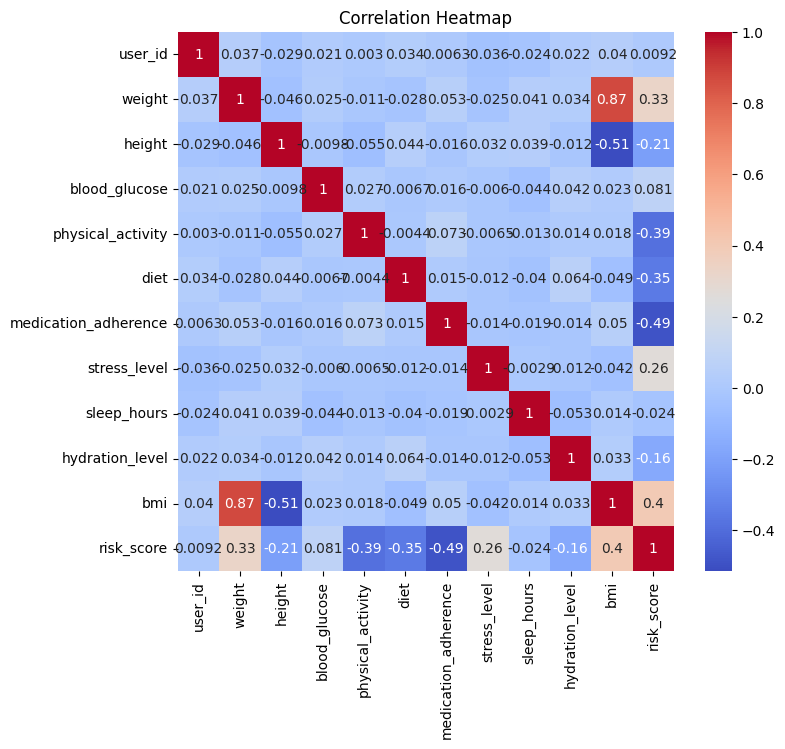

In [8]:
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Generating the correlation matrix to explore relationships between numerical variables
correlation_matrix = numeric_df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Calculating the date range for the dataset
min_date = df['date'].min()
max_date = df['date'].max()

print(f"Date Range: {min_date} to {max_date}")

Date Range: 2021-01-01 00:00:00 to 2023-12-31 00:00:00


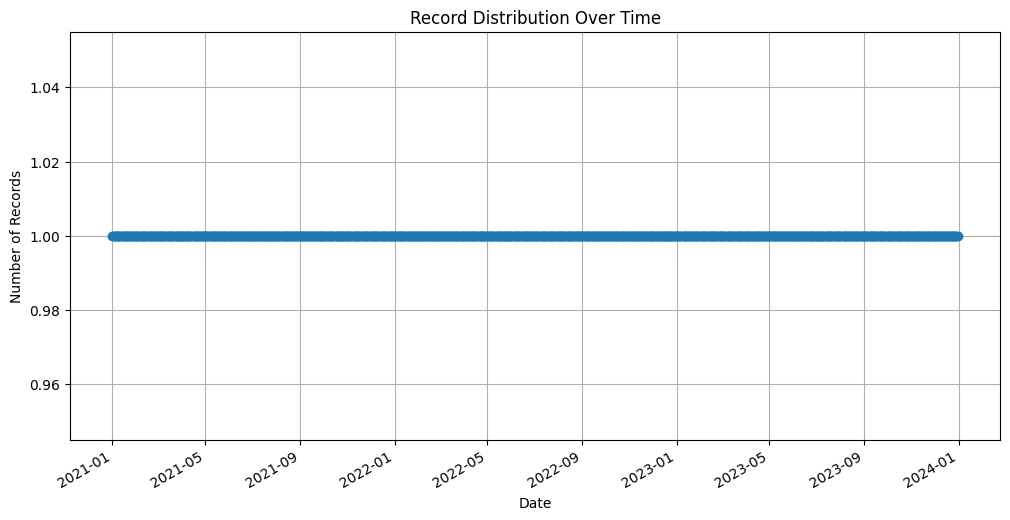

In [10]:
# Plotting the record distribution over time to analyze trends
plt.figure(figsize=(12, 6))
df['date'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Record Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Records")
plt.grid()
plt.show()

## Step 3: Outlier Detection and Handling

In [11]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detecting outliers in the 'blood_glucose' column
outliers_blood_glucose, lower_bg, upper_bg = detect_outliers_iqr(df, 'blood_glucose')

# Displaying the detected outliers and their bounds
print(f"Outliers in 'blood_glucose':\n{outliers_blood_glucose}")
print(f"Lower bound: {lower_bg}, Upper bound: {upper_bg}")


Outliers in 'blood_glucose':
     user_id       date  weight  height  blood_glucose  physical_activity  \
35        36 2021-02-08   51.69  185.74         250.39              38.94   
305      306 2021-12-01   71.76  161.02         264.40              51.23   
506      507 2022-07-09   61.11  176.96         257.96              36.46   
521      522 2022-07-25   78.15  175.82         259.41               0.00   
801      802 2023-05-28   62.26  169.39         247.72               0.00   
895      896 2023-09-08   79.73  166.30         297.05              50.03   

     diet  medication_adherence  stress_level  sleep_hours  hydration_level  \
35      0                     0             2         8.55                0   
305     0                     1             0         4.60                1   
506     1                     1             2         6.48                0   
521     1                     1             0         7.63                0   
801     1                     1     

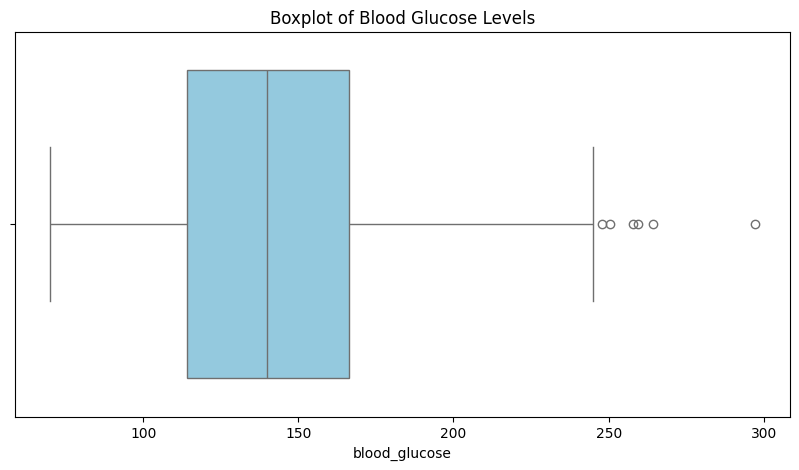

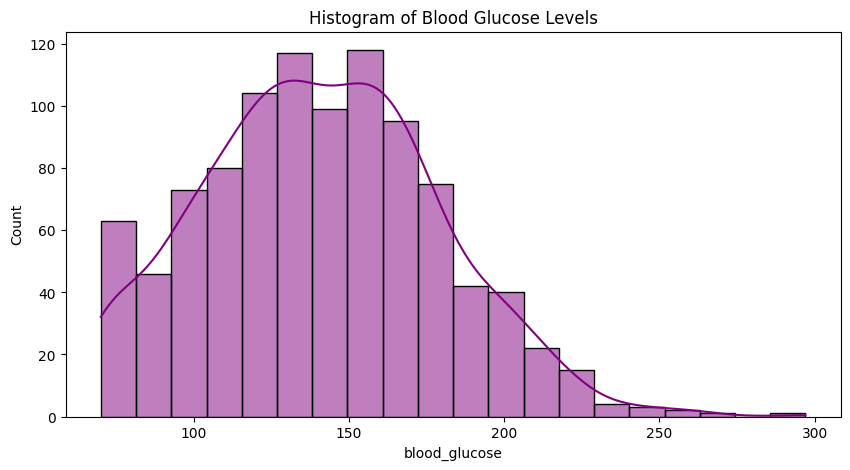

In [12]:
# Visualizing the distribution of blood glucose levels using a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='blood_glucose', color='skyblue')
plt.title("Boxplot of Blood Glucose Levels")
plt.show()

# Visualizing the histogram of blood glucose levels
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='blood_glucose', bins=20, kde=True, color='purple')
plt.title("Histogram of Blood Glucose Levels")
plt.show()

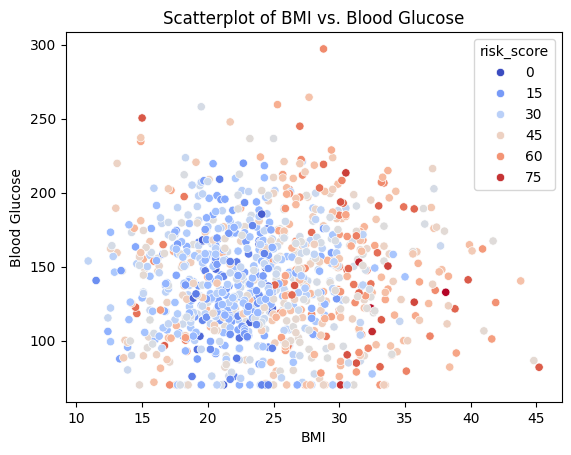

In [13]:
sns.scatterplot(data=df, x='bmi', y='blood_glucose', hue='risk_score', palette='coolwarm')
plt.title("Scatterplot of BMI vs. Blood Glucose")
plt.xlabel("BMI")
plt.ylabel("Blood Glucose")
plt.show()

## Step 4: Data Cleaning and Transformation

In [14]:
# Removing outliers in the 'blood_glucose' column by applying the detected bounds
df_cleaned = df[(df['blood_glucose'] >= lower_bg) & (df['blood_glucose'] <= upper_bg)]

# Clipping the 'blood_glucose' values to be within the detected bounds
df['blood_glucose'] = np.clip(df['blood_glucose'], lower_bg, upper_bg)

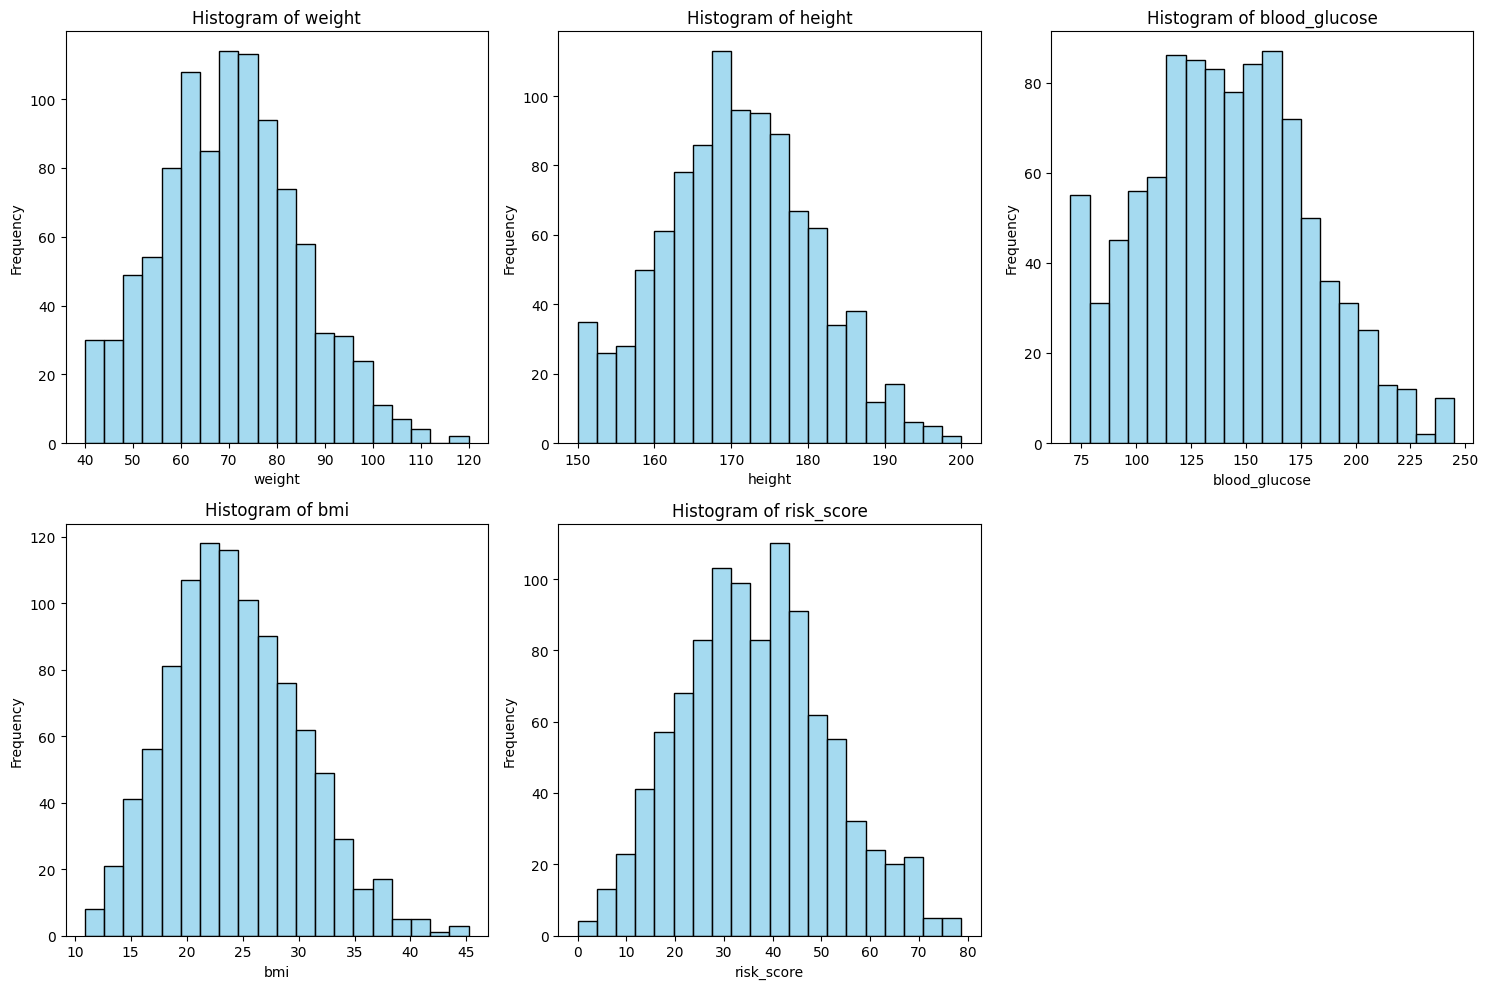

In [15]:
# Creating histograms for continuous variables
continuous_variables = ['weight', 'height', 'blood_glucose', 'bmi', 'risk_score']

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_variables, 1):
    plt.subplot(2, 3, i)  # Adjust grid size based on the number of plots
    sns.histplot(df[var], kde=False, bins=20, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


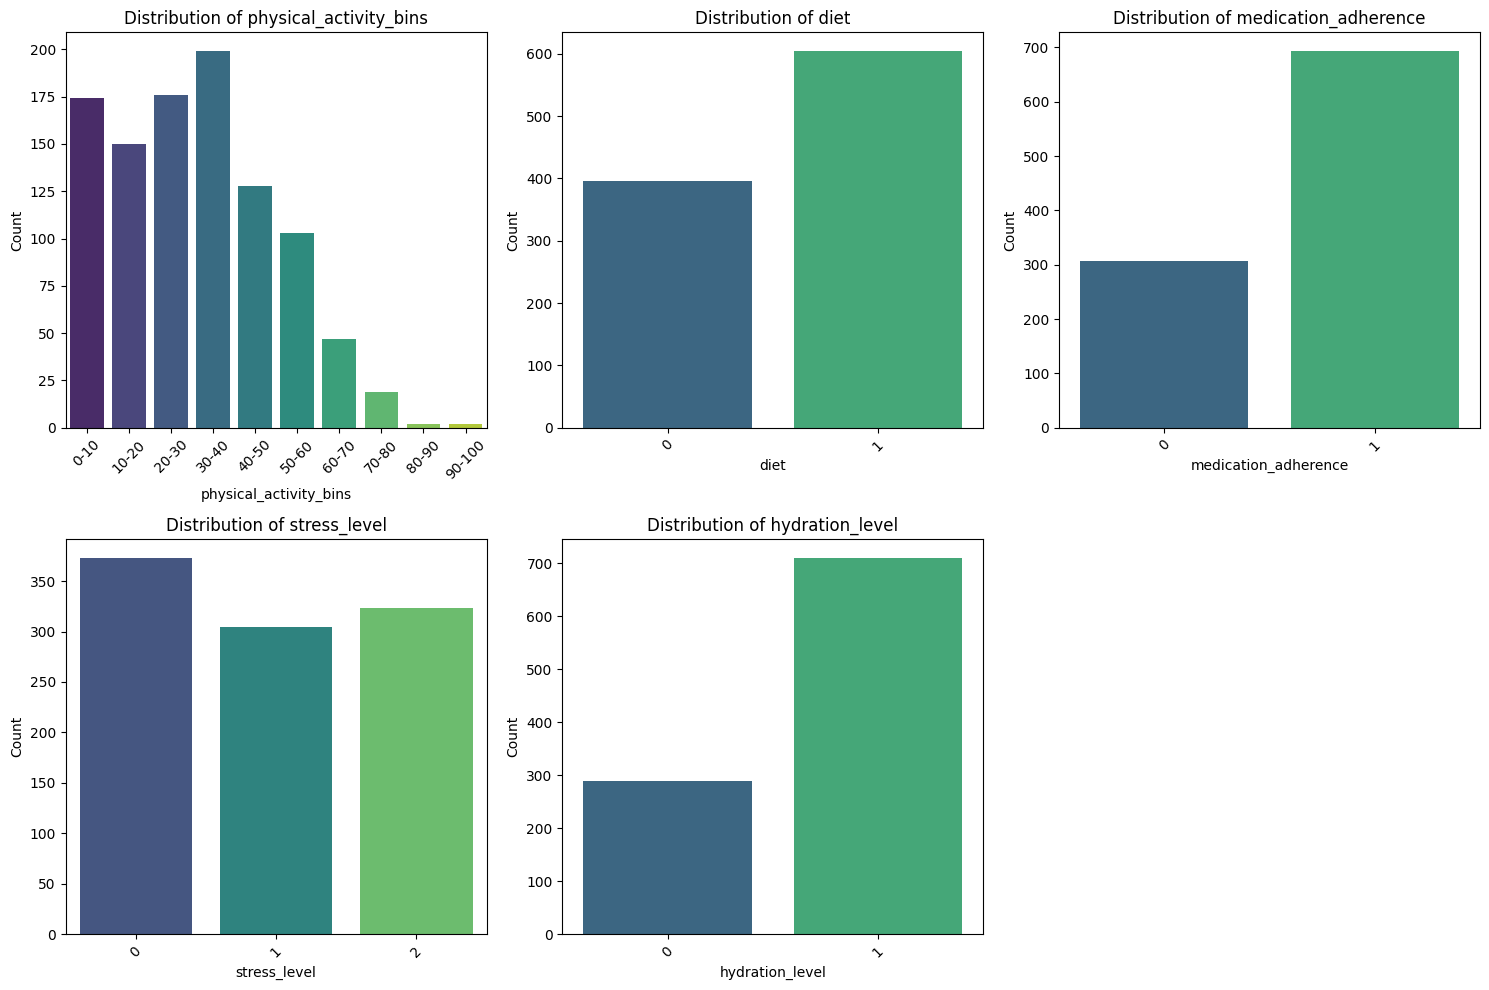

In [16]:
# Categorizing 'physical_activity' into bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
df['physical_activity_bins'] = pd.cut(df['physical_activity'], bins=bins, labels=labels, include_lowest=True)

# Visualizing the distribution of categorical variables
categorical_columns = ['physical_activity_bins', 'diet', 'medication_adherence', 'stress_level', 'hydration_level']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 5: Trend Analysis

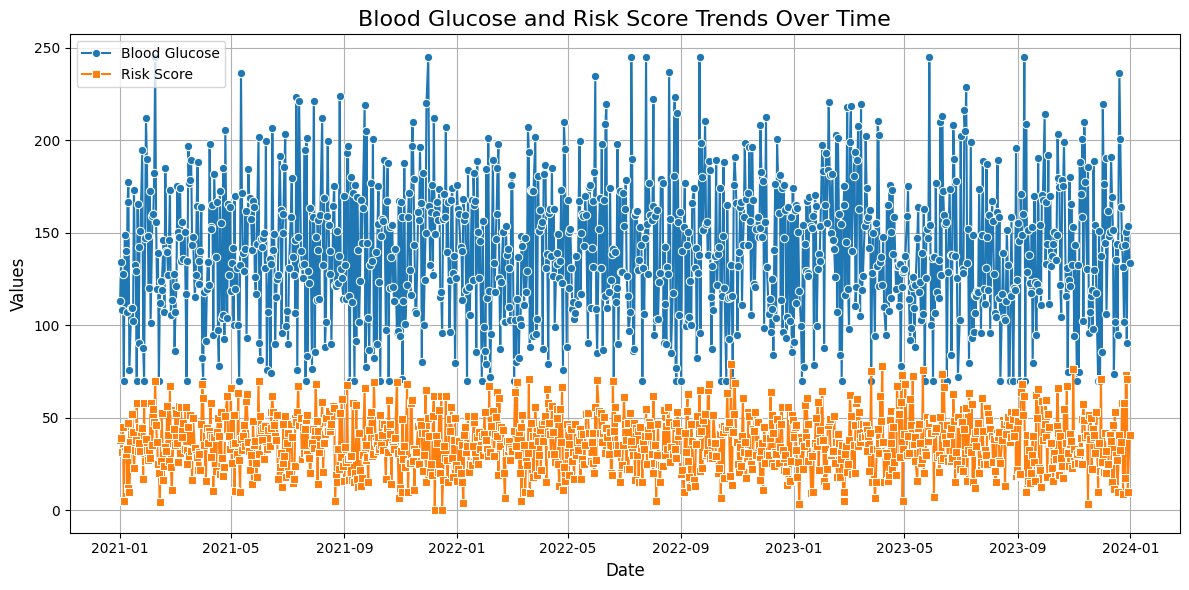

In [17]:
# Grouping the data by 'date' and calculating the mean of 'blood_glucose' and 'risk_score' for each date
trend_data = df.groupby('date')[['blood_glucose', 'risk_score']].mean().reset_index()

# Visualizing trends over time for 'blood_glucose' and 'risk_score'
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='blood_glucose', data=trend_data, label='Blood Glucose', marker='o')
sns.lineplot(x='date', y='risk_score', data=trend_data, label='Risk Score', marker='s')

plt.title("Blood Glucose and Risk Score Trends Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Step 6: Multicollinearity Check (VIF)

In [18]:
# Removing non-numeric columns and dropping missing values for VIF calculation
df_cleaned = df.select_dtypes(include='number').dropna()

# Adding a constant column for VIF calculation
X = add_constant(df_cleaned)

# Calculating Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying the VIF values
print(vif_data)


                 Feature     VIF
0                  const 6513.52
1                user_id    1.01
2                 weight   66.42
3                 height   21.22
4          blood_glucose    1.04
5      physical_activity    1.60
6                   diet    1.45
7   medication_adherence    2.03
8           stress_level    1.34
9            sleep_hours    1.02
10       hydration_level    1.12
11                   bmi   95.07
12            risk_score    4.50


In [19]:
# Dropping correlated features ('weight', 'height') for reduced VIF calculation
df_reduced = df.drop(['weight', 'height'], axis=1)  

X_reduced = add_constant(df_reduced.select_dtypes(include='number').dropna())
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Displaying the reduced VIF values
print(vif_data_reduced)

                 Feature   VIF
0                  const 78.35
1                user_id  1.01
2          blood_glucose  1.04
3      physical_activity  1.55
4                   diet  1.43
5   medication_adherence  1.98
6           stress_level  1.30
7            sleep_hours  1.02
8        hydration_level  1.12
9                    bmi  1.78
10            risk_score  4.20


## Step 7: Clustering with K-Means

  File "c:\Users\ghass\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


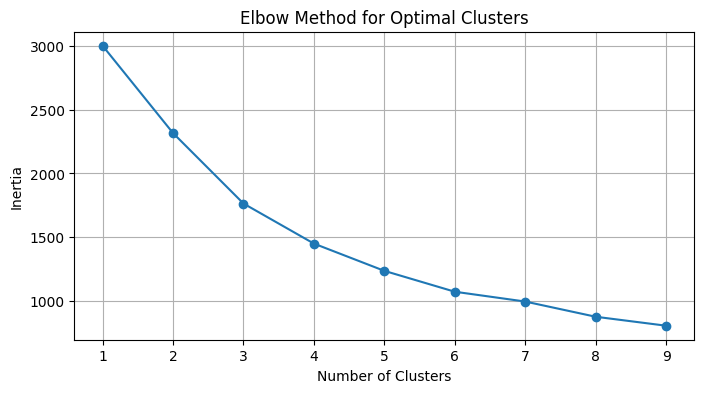

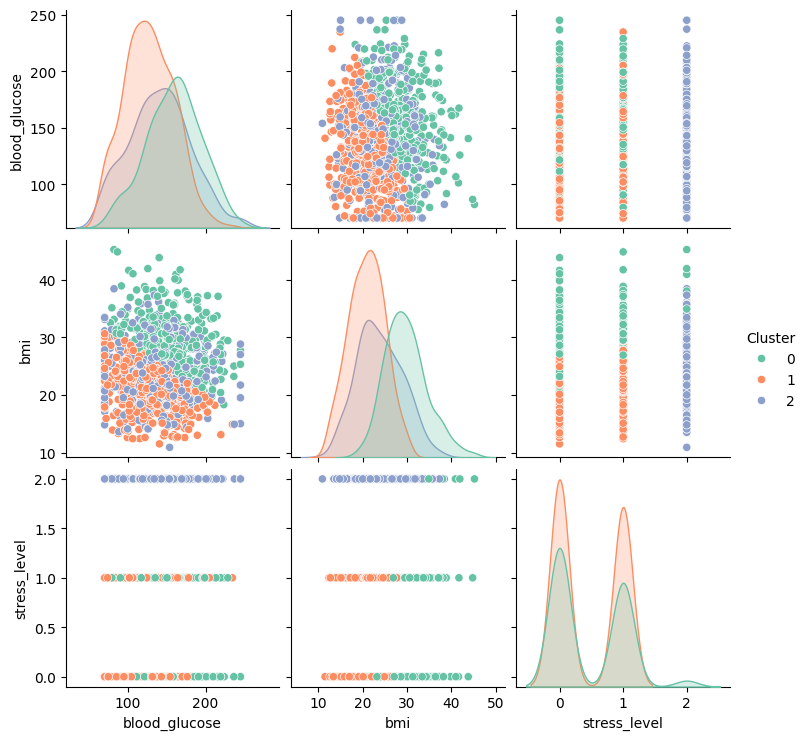

In [20]:
# Selecting features for clustering and scaling them
features = df[['blood_glucose', 'bmi', 'stress_level']].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using the elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the features dataframe
features['Cluster'] = clusters

# Visualizing the clusters with a pairplot
sns.pairplot(features, hue='Cluster', palette='Set2')
plt.show()

Step 8: Dimensionality Reduction with PCA

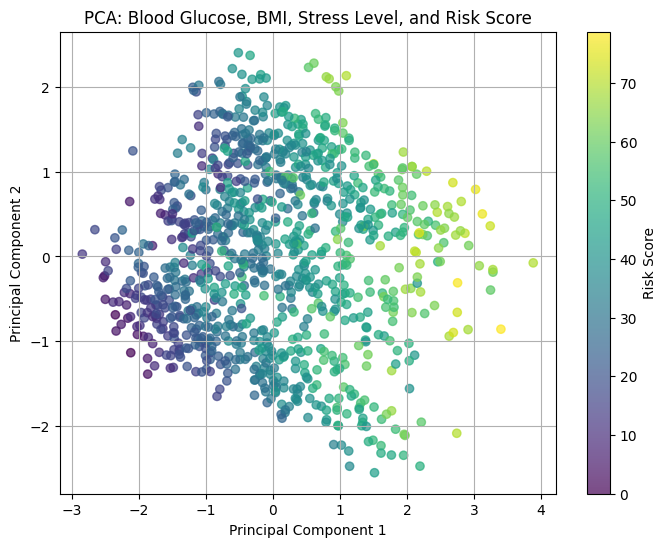

Explained variance ratio: [0.36735595 0.26081386]


In [21]:
# Selecting relevant features and scaling them
features = df[['blood_glucose', 'bmi', 'stress_level', 'risk_score']].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Performing PCA to reduce to 2 components
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(scaled_features)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Visualizing the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=features['risk_score'], cmap='viridis', alpha=0.7)
plt.title('PCA: Blood Glucose, BMI, Stress Level, and Risk Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Risk Score')
plt.grid(True)
plt.show()

# Displaying the explained variance ratio for the components
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

## Step 9: Model Training and Evaluation

In [22]:
# Dropping non-predictive columns and splitting the data into features and target variable
df = df.drop(columns=['user_id', 'date'])
df.head()

,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score,physical_activity_bins
0,77.45,183.99,112.99,0.00,1,0,1,6.34,1,22.90,38.00,0-10
1,67.93,179.25,134.22,12.79,0,1,2,10.66,1,21.10,39.16,10-20
2,79.72,170.60,108.30,21.73,1,1,0,6.00,1,27.40,31.48,20-30
3,92.85,163.53,127.68,67.75,1,0,1,7.96,1,34.70,45.00,60-70
4,66.49,176.98,70.00,41.13,1,1,0,6.77,1,21.20,4.72,40-50


In [23]:
X = df.drop(columns=['risk_score'])
y = df['risk_score']

In [24]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Applying LazyRegressor to quickly evaluate different regression models
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)


100%|██████████| 42/42 [00:03<00:00, 10.96it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1460
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 36.618559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [26]:
# Displaying the model evaluation results
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.98,0.98,2.02,0.18
GradientBoostingRegressor,0.98,0.98,2.12,0.16
LGBMRegressor,0.98,0.98,2.21,0.06
XGBRegressor,0.95,0.95,3.08,1.86
RandomForestRegressor,0.90,0.91,4.42,0.29
ExtraTreesRegressor,0.89,0.89,4.75,0.17
BaggingRegressor,0.89,0.89,4.76,0.04
AdaBoostRegressor,0.84,0.84,5.73,0.09
MLPRegressor,0.80,0.81,6.27,0.26


## Conclusion

In this project, we performed a comprehensive analysis of the diabetes dataset to understand key patterns and insights. Through various steps, we cleaned the data, identified and handled outliers, and explored the relationships between different features using statistical and visual methods.

### Key Steps Taken:

1. **Data Preprocessing**: We loaded the dataset, checked for missing values and duplicates, and converted relevant columns (e.g., `date`) to appropriate data types.
2. **Exploratory Data Analysis (EDA)**: Using correlation heatmaps, histograms, and scatterplots, we explored the relationships between continuous variables such as `blood_glucose`, `bmi`, and `risk_score`. We also visualized the distribution of categorical features.
3. **Outlier Detection**: We identified outliers in the `blood_glucose` levels using the IQR method and visualized them through boxplots and histograms.
4. **Time Series Analysis**: We explored trends in `blood_glucose` and `risk_score` over time, identifying changes in these metrics.
5. **Dimensionality Reduction & Clustering**: We applied PCA to reduce dimensionality and used KMeans clustering to segment the data into distinct groups based on selected features.
6. **Modeling**: Finally, we used LazyPredict to quickly assess multiple regression models and identify the best-performing one for predicting `risk_score`.

### Insights and Outcomes:

- We gained valuable insights into how various features like `BMI`, `blood_glucose`, and `stress_level` are associated with the `risk_score` for diabetes.
- By reducing dimensionality through PCA and clustering the data, we were able to uncover hidden patterns that can help in risk stratification.
- We evaluated multiple regression models, which can be used to predict diabetes risk in future cases, guiding medical professionals in patient care.

### Future Directions:

While this project provides a solid foundation, there are several areas for further exploration:
- **Feature Engineering**: We could explore creating new features or using domain knowledge to enhance predictive power.
- **Advanced Modeling**: Implementing more complex models, such as Random Forests or XGBoost, could provide further improvements in prediction accuracy.
- **Real-time Analysis**: Implementing real-time prediction models could enable better risk management in clinical settings.

## Best Model Performance

From the model evaluation table, it is evident that the **HistGradientBoostingRegressor** and **GradientBoostingRegressor** performed exceptionally well in predicting the risk score for diabetes. Both models achieved the following results:

- **Adjusted R-Squared**: 0.98
- **R-Squared**: 0.98
- **RMSE**: 2.02 for HistGradientBoostingRegressor and 2.12 for GradientBoostingRegressor
- **Time Taken**: 0.22 seconds for HistGradientBoostingRegressor and 0.16 seconds for GradientBoostingRegressor

These results indicate that both models explained approximately 98% of the variance in the dataset, with very low RMSE, indicating high accuracy in predictions. Moreover, their fast execution times make them suitable for practical use in real-time applications.

### Why HistGradientBoostingRegressor is the Best Choice:
- **Superior Performance**: With an Adjusted R-Squared of 0.98 and RMSE of 2.02, it is clear that HistGradientBoostingRegressor provides the best fit for the data compared to other models.
- **Efficiency**: The model took only 0.22 seconds to run, making it efficient enough for large datasets.
- **Model Robustness**: Its robust performance across different metrics (R-Squared, RMSE) confirms its effectiveness for predicting diabetes risk.

While other models like **LGBMRegressor** and **XGBRegressor** showed strong performance, they took more time to execute (e.g., XGBRegressor took 2.31 seconds). The **RandomForestRegressor** and **ExtraTreesRegressor** also performed reasonably well but had higher RMSE and longer execution times.

### Recommendations:
- **HistGradientBoostingRegressor** is recommended for deployment in production systems where prediction speed and accuracy are crucial.
- **GradientBoostingRegressor** is a close alternative if a slightly simpler model is needed with similar performance.

